In [1]:
#import libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

In [3]:
# !pip install fredapi >/dev/null

In [9]:
from fredapi import Fred

In [111]:
pd.set_option('max_columns',500)

In [11]:
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']

### FRED API KEY

In [17]:
fred_key = '95bc4d0733e667f43a89e1ab74c91335'

# 1. Create FRED Object

In [18]:
fred = Fred(api_key=fred_key)

In [19]:
fred

# 2. Search for economic data

In [20]:
fred.search('S&P')

id realtime_start realtime_end  \
series id                                                        
CSUSHPINSA              CSUSHPINSA     2024-05-09   2024-05-09   
CSUSHPISA                CSUSHPISA     2024-05-09   2024-05-09   
SP500                        SP500     2024-05-09   2024-05-09   
SPCS20RSA                SPCS20RSA     2024-05-09   2024-05-09   
SPCS20RNSA              SPCS20RNSA     2024-05-09   2024-05-09   
...                            ...            ...          ...   
DDOI02CYA156NWDB  DDOI02CYA156NWDB     2024-05-09   2024-05-09   
DDDI05DZA156NWDB  DDDI05DZA156NWDB     2024-05-09   2024-05-09   
DDDM07ECA156NWDB  DDDM07ECA156NWDB     2024-05-09   2024-05-09   
DDDI02CYA156NWDB  DDDI02CYA156NWDB     2024-05-09   2024-05-09   
DDDI01PHA156NWDB  DDDI01PHA156NWDB     2024-05-09   2024-05-09   

                                                              title  \
series id                                                             
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
CSUSHPISA         S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
SPCS20RSA         S&P CoreLogic Case-Shiller 20-City Composite H...   
SPCS20RNSA        S&P CoreLogic Case-Shiller 20-City Composite H...   
...                                                             ...   
DDOI02CYA156NWDB                    Bank Deposits to GDP for Cyprus   
DDDI05DZA156NWDB              Liquid Liabilities to GDP for Algeria   
DDDM07ECA156NWDB  Outstanding Total International Debt Securitie...   
DDDI02CYA156NWDB        Deposit Money Bank Assets to GDP for Cyprus   
DDDI01PHA156NWDB  Private Credit by Deposit Money Banks to GDP f...   

                 observation_start observation_end     frequency  \
series id                                                          
CSUSHPINSA              1987-01-01      2024-02-01       Monthly   
CSUSHPISA               1987-01-01      2024-02-01       Monthly   
SP500                   2014-05-09      2024-05-08  Daily, Close   
SPCS20RSA               2000-01-01      2024-02-01       Monthly   
SPCS20RNSA              2000-01-01      2024-02-01       Monthly   
...                            ...             ...           ...   
DDOI02CYA156NWDB        1975-01-01      2007-01-01        Annual   
DDDI05DZA156NWDB        1964-01-01      2021-01-01        Annual   
DDDM07ECA156NWDB        1980-01-01      2020-01-01        Annual   
DDDI02CYA156NWDB        1975-01-01      2021-01-01        Annual   
DDDI01PHA156NWDB        1960-01-01      2021-01-01        Annual   

                 frequency_short               units         units_short  \
series id                                                                  
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
CSUSHPISA                      M  Index Jan 2000=100  Index Jan 2000=100   
SP500                          D               Index               Index   
SPCS20RSA                      M  Index Jan 2000=100  Index Jan 2000=100   
SPCS20RNSA                     M  Index Jan 2000=100  Index Jan 2000=100   
...                          ...                 ...                 ...   
DDOI02CYA156NWDB               A             Percent                   %   
DDDI05DZA156NWDB               A             Percent                   %   
DDDM07ECA156NWDB               A             Percent                   %   
DDDI02CYA156NWDB               A             Percent                   %   
DDDI01PHA156NWDB               A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
CSUSHPINSA        Not Seasonally Adjusted                       NSA   
CSUSHPISA             Seasonally Adjusted                        SA   
SP500             Not Seasonally Adjusted                       NSA   
SPCS20RSA           

In [23]:
sp_search = fred.search('S&P', order_by='popularity')

In [24]:
sp_search.shape

(1000, 15)

In [26]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-05-09   2024-05-09   
CSUSHPINSA          CSUSHPINSA     2024-05-09   2024-05-09   
SP500                    SP500     2024-05-09   2024-05-09   
MEHOINUSA672N    MEHOINUSA672N     2024-05-09   2024-05-09   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-05-09   2024-05-09   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-05-08  Daily, Close   
CSUSHPINSA            1987-01-01      2024-02-01       Monthly   
SP500                 2014-05-09      2024-05-08  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-05-08  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-05-09 09:13:09-05:00   
CSUSHPINSA                           NSA  2024-04-30 08:12:01-05:00   
SP500                                NSA  2024-05-08 19:10:56-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-05-09 09:13:12-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3.Pull Raw Data & Plot

In [27]:
fred.get_series(series_id='SP500')

2014-05-09    1878.48
2014-05-12    1896.65
2014-05-13    1897.45
2014-05-14    1888.53
2014-05-15    1870.85
               ...   
2024-05-02    5064.20
2024-05-03    5127.79
2024-05-06    5180.74
2024-05-07    5187.70
2024-05-08    5187.67
Length: 2609, dtype: float64

In [28]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

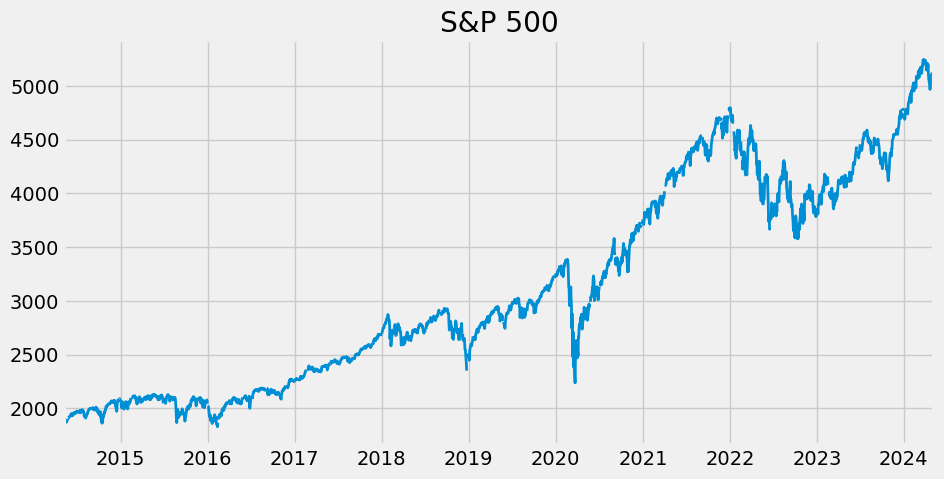

In [32]:
sp500.plot(figsize=(10,5), title='S&P 500',lw=2)

# 4. Pull and Join Multiple Data Series

In [34]:
unemp_results = fred.search('unemployment')
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-09   2024-05-09   
UNRATENSA                          UNRATENSA     2024-05-09   2024-05-09   
UNEMPLOY                            UNEMPLOY     2024-05-09   2024-05-09   
NROU                                    NROU     2024-05-09   2024-05-09   
CCSA                                    CCSA     2024-05-09   2024-05-09   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-05-09   2024-05-09   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-05-09   2024-05-09   
LNS14000315                      LNS14000315     2024-05-09   2024-05-09   
LNU04032222                      LNU04032222     2024-05-09   2024-05-09   
LNU04032223                      LNU04032223     2024-05-09   2024-05-09   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
UNEMPLOY                     1948-01-01      2024-04-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-04-27   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-04-01   
LNU04032222                  2000-01-01      2024-04-01   
LNU04032223                  2000-01-01      2024-04-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [35]:
unrate = fred.get_series('UNRATE')

In [36]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
Length: 916, dtype: float64

<Axes: >

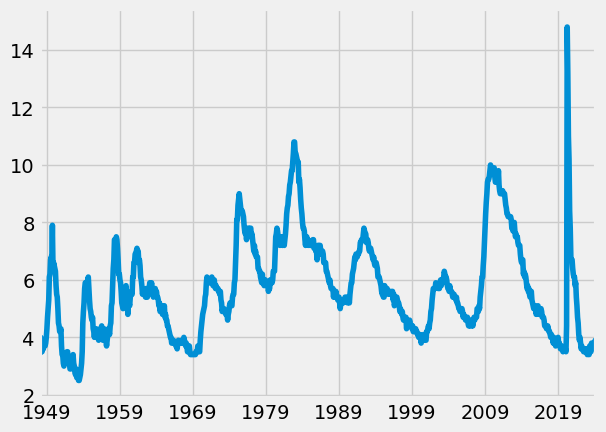

In [37]:
unrate.plot()

In [38]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-09   2024-05-09   
UNRATENSA                          UNRATENSA     2024-05-09   2024-05-09   
UNEMPLOY                            UNEMPLOY     2024-05-09   2024-05-09   
NROU                                    NROU     2024-05-09   2024-05-09   
CCSA                                    CCSA     2024-05-09   2024-05-09   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-05-09   2024-05-09   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-05-09   2024-05-09   
LNS14000315                      LNS14000315     2024-05-09   2024-05-09   
LNU04032222                      LNU04032222     2024-05-09   2024-05-09   
LNU04032223                      LNU04032223     2024-05-09   2024-05-09   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
UNEMPLOY                     1948-01-01      2024-04-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-04-27   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-04-01   
LNU04032222                  2000-01-01      2024-04-01   
LNU04032223                  2000-01-01      2024-04-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [39]:
fred.search('unemployment state')

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-09   2024-05-09   
UNRATENSA                          UNRATENSA     2024-05-09   2024-05-09   
CCSA                                    CCSA     2024-05-09   2024-05-09   
CCNSA                                  CCNSA     2024-05-09   2024-05-09   
UNEMPLOY                            UNEMPLOY     2024-05-09   2024-05-09   
...                                      ...            ...          ...   
LAUCN518000000000004A  LAUCN518000000000004A     2024-05-09   2024-05-09   
LAUCN540650000000004A  LAUCN540650000000004A     2024-05-09   2024-05-09   
LAUCN540650000000004    LAUCN540650000000004     2024-05-09   2024-05-09   
LAUCN480970000000004A  LAUCN480970000000004A     2024-05-09   2024-05-09   
LAUCN281590000000004A  LAUCN281590000000004A     2024-05-09   2024-05-09   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
UNRATENSA                                     Unemployment Rate   
CCSA                    Continued Claims (Insured Unemployment)   
CCNSA                   Continued Claims (Insured Unemployment)   
UNEMPLOY                                     Unemployment Level   
...                                                         ...   
LAUCN518000000000004A    Unemployed Persons in Suffolk City, VA   
LAUCN540650000000004A   Unemployed Persons in Morgan County, WV   
LAUCN540650000000004    Unemployed Persons in Morgan County, WV   
LAUCN480970000000004A    Unemployed Persons in Cooke County, TX   
LAUCN281590000000004A  Unemployed Persons in Winston County, MS   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
CCSA                         1967-01-07      2024-04-27   
CCNSA                        1967-01-07      2024-04-27   
UNEMPLOY                     1948-01-01      2024-04-01   
...                                 ...             ...   
LAUCN518000000000004A        1990-01-01      2023-01-01   
LAUCN540650000000004A        1990-01-01      2023-01-01   
LAUCN540650000000004         1990-01-01      2024-03-01   
LAUCN480970000000004A        1990-01-01      2023-01-01   
LAUCN281590000000004A        1990-01-01      2023-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
CCSA                   Weekly, Ending Saturday               W   
CCNSA                  Weekly, Ending Saturday               W   
UNEMPLOY                               Monthly               M   
...                                        ...             ...   
LAUCN518000000000004A                   Annual               A   
LAUCN540650000000004A                   Annual               A   
LAUCN540650000000004                   Monthly               M   
LAUCN480970000000004A                   Annual               A   
LAUCN281590000000004A                   Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
CCSA                                 Number             Number   
CCNSA                                Number             Number   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
...                                     ...                ...   
LAUCN518000000000004A     

In [41]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-05-09   2024-05-09   
UNRATENSA      UNRATENSA     2024-05-09   2024-05-09   
LNS14000006  LNS14000006     2024-05-09   2024-05-09   
UNEMPLOY        UNEMPLOY     2024-05-09   2024-05-09   
LNU04000006  LNU04000006     2024-05-09   2024-05-09   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-05-09   2024-05-09   
SCMARI7URN    SCMARI7URN     2024-05-09   2024-05-09   
VAALBE7URN    VAALBE7URN     2024-05-09   2024-05-09   
HAGE124UR      HAGE124UR     2024-05-09   2024-05-09   
MIINGH5URN    MIINGH5URN     2024-05-09   2024-05-09   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-04-01   Monthly               M   
UNRATENSA          1948-01-01      2024-04-01   Monthly               M   
LNS14000006        1972-01-01      2024-04-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-04-01   Monthly               M   
LNU04000006        1972-01-01      2024-04-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-04-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-03-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-03-01   Monthly               M   
HAGE124UR          1990-01-01      2024-03-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-03-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [42]:
unemp_df.query('seasonal_adjustment =="Seasonally Adjusted"')

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-05-09   2024-05-09   
LNS14000006                LNS14000006     2024-05-09   2024-05-09   
UNEMPLOY                      UNEMPLOY     2024-05-09   2024-05-09   
U6RATE                          U6RATE     2024-05-09   2024-05-09   
CAUR                              CAUR     2024-05-09   2024-05-09   
...                                ...            ...          ...   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-05-09   2024-05-09   
LNS13023557                LNS13023557     2024-05-09   2024-05-09   
LBSSA10                        LBSSA10     2024-05-09   2024-05-09   
LBSSA44                        LBSSA44     2024-05-09   2024-05-09   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
UNEMPLOY                                           Unemployment Level   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
...                                                               ...   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LNS13023557            Unemployment Level - Reentrants to Labor Force   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-04-01   Monthly   
LNS14000006               1972-01-01      2024-04-01   Monthly   
UNEMPLOY                  1948-01-01      2024-04-01   Monthly   
U6RATE                    1994-01-01      2024-04-01   Monthly   
CAUR                      1976-01-01      2024-03-01   Monthly   
...                              ...             ...       ...   
NEIPTERM156SFRBRIC        1994-01-01      2024-03-01   Monthly   
LNS13023557               1967-01-01      2024-04-01   Monthly   
LBSSA10                   1976-01-01      2024-03-01   Monthly   
LBSSA44                   1976-01-01      2024-03-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-03-01   Monthly   

                   frequency_short                 units        units_short  \
series id                                                                     
UNRATE                           M               Percent                  %   
LNS14000006                      M               Percent                  %   
UNEMPLOY                         M  Thousands of Persons  Thous. of Persons   
U6RATE                           M               Percent                  %   
CAUR                             M               Percent                  %   
...                            ...                   ...                ...   
NEIPTERM156SFRBRIC               M               Percent                  %   
LNS13023557                      M  Thousands of Persons  Thous. of Persons   
LBSSA10                          M               Percent                  %   
LBSSA44                          M               Percent                  %   
LRUN25TTUSM156S                  M               Percent                  %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
UNRATE              Seasonally Adjusted                        SA   
LNS14000006         Seasonally Adjusted                        SA   
UNEMPLOY    

In [43]:
unemp_df.query('seasonal_adjustment =="Seasonally Adjusted" and units == "Percent"')

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-05-09   2024-05-09   
LNS14000006                LNS14000006     2024-05-09   2024-05-09   
U6RATE                          U6RATE     2024-05-09   2024-05-09   
CAUR                              CAUR     2024-05-09   2024-05-09   
TXUR                              TXUR     2024-05-09   2024-05-09   
...                                ...            ...          ...   
LNS14000150                LNS14000150     2024-05-09   2024-05-09   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-05-09   2024-05-09   
LBSSA10                        LBSSA10     2024-05-09   2024-05-09   
LBSSA44                        LBSSA44     2024-05-09   2024-05-09   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-04-01   Monthly   
LNS14000006               1972-01-01      2024-04-01   Monthly   
U6RATE                    1994-01-01      2024-04-01   Monthly   
CAUR                      1976-01-01      2024-03-01   Monthly   
TXUR                      1976-01-01      2024-03-01   Monthly   
...                              ...             ...       ...   
LNS14000150               1955-01-01      2024-04-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-03-01   Monthly   
LBSSA10                   1976-01-01      2024-03-01   Monthly   
LBSSA44                   1976-01-01      2024-03-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-03-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   
LBSSA10                          M  Percent           %  Seasonally Adjusted   
LBSSA44                          M  Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S                  M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-05-03 07:45:01-05:00   
LNS14000006                               SA  2024

In [44]:
unemp_df = unemp_df.query('seasonal_adjustment =="Seasonally Adjusted" and units == "Percent"')
unemp_df

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-05-09   2024-05-09   
LNS14000006                LNS14000006     2024-05-09   2024-05-09   
U6RATE                          U6RATE     2024-05-09   2024-05-09   
CAUR                              CAUR     2024-05-09   2024-05-09   
TXUR                              TXUR     2024-05-09   2024-05-09   
...                                ...            ...          ...   
LNS14000150                LNS14000150     2024-05-09   2024-05-09   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-05-09   2024-05-09   
LBSSA10                        LBSSA10     2024-05-09   2024-05-09   
LBSSA44                        LBSSA44     2024-05-09   2024-05-09   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-04-01   Monthly   
LNS14000006               1972-01-01      2024-04-01   Monthly   
U6RATE                    1994-01-01      2024-04-01   Monthly   
CAUR                      1976-01-01      2024-03-01   Monthly   
TXUR                      1976-01-01      2024-03-01   Monthly   
...                              ...             ...       ...   
LNS14000150               1955-01-01      2024-04-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-03-01   Monthly   
LBSSA10                   1976-01-01      2024-03-01   Monthly   
LBSSA44                   1976-01-01      2024-03-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-03-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   
LBSSA10                          M  Percent           %  Seasonally Adjusted   
LBSSA44                          M  Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S                  M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-05-03 07:45:01-05:00   
LNS14000006                               SA  2024

In [48]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-05-09   2024-05-09   
LNS14000006            LNS14000006     2024-05-09   2024-05-09   
CAUR                          CAUR     2024-05-09   2024-05-09   
TXUR                          TXUR     2024-05-09   2024-05-09   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-05-09   2024-05-09   
...                            ...            ...          ...   
LNS14000048            LNS14000048     2024-05-09   2024-05-09   
LNS14000089            LNS14000089     2024-05-09   2024-05-09   
M08311USM156SNBR  M08311USM156SNBR     2024-05-09   2024-05-09   
LNS14000150            LNS14000150     2024-05-09   2024-05-09   
LRUN25TTUSM156S    LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Infra-Annual Labor Statistics: Unemployment Ra...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-04-01   Monthly               M   
LNS14000006             1972-01-01      2024-04-01   Monthly               M   
CAUR                    1976-01-01      2024-03-01   Monthly               M   
TXUR                    1976-01-01      2024-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000048             1948-01-01      2024-04-01   Monthly               M   
LNS14000089             1948-01-01      2024-04-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-04-01   Monthly               M   
LRUN25TTUSM156S         1955-01-01      2024-03-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-05-03 07:45:01-05:00   
LNS14000006                             SA  2024-05-03 07:45:19-05:00   
CAUR                                    SA  2024-04-22 10:41:02-05:00   
TXUR                                

In [49]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(99, 15)

In [50]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-05-09   2024-05-09   
LNS14000006            LNS14000006     2024-05-09   2024-05-09   
CAUR                          CAUR     2024-05-09   2024-05-09   
TXUR                          TXUR     2024-05-09   2024-05-09   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-05-09   2024-05-09   
...                            ...            ...          ...   
LNS14000048            LNS14000048     2024-05-09   2024-05-09   
LNS14000089            LNS14000089     2024-05-09   2024-05-09   
M08311USM156SNBR  M08311USM156SNBR     2024-05-09   2024-05-09   
LNS14000150            LNS14000150     2024-05-09   2024-05-09   
LRUN25TTUSM156S    LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Infra-Annual Labor Statistics: Unemployment Ra...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-04-01   Monthly               M   
LNS14000006             1972-01-01      2024-04-01   Monthly               M   
CAUR                    1976-01-01      2024-03-01   Monthly               M   
TXUR                    1976-01-01      2024-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000048             1948-01-01      2024-04-01   Monthly               M   
LNS14000089             1948-01-01      2024-04-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-04-01   Monthly               M   
LRUN25TTUSM156S         1955-01-01      2024-03-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-05-03 07:45:01-05:00   
LNS14000006                             SA  2024-05-03 07:45:19-05:00   
CAUR                                    SA  2024-04-22 10:41:02-05:00   
TXUR                                

In [51]:
#index has all the id we want to pull
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [52]:
len(unemp_df.index)

99

In [54]:
#pull the series for indexes in unemp_Df
for myid in unemp_df.index: 
    results = fred.get_series(myid)
    break

In [55]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
Length: 916, dtype: float64

In [57]:
#create the series into a dataframe
results.to_frame(name=myid)

UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2023-12-01     3.7
2024-01-01     3.7
2024-02-01     3.9
2024-03-01     3.8
2024-04-01     3.9

[916 rows x 1 columns]

In [58]:
#make a list called all_result that will store all results, everyitme it loops 
#it will store/append the results in the all_results list
all_results = []        

for myid in unemp_df.index:  
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [65]:
type(all_results)

list

In [60]:
all_results[0]

UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2023-12-01     3.7
2024-01-01     3.7
2024-02-01     3.9
2024-03-01     3.8
2024-04-01     3.9

[916 rows x 1 columns]

In [61]:
all_results[1]

LNS14000006
1972-01-01         11.2
1972-02-01         11.2
1972-03-01         10.7
1972-04-01          9.8
1972-05-01         10.2
...                 ...
2023-12-01          5.2
2024-01-01          5.3
2024-02-01          5.6
2024-03-01          6.4
2024-04-01          5.6

[628 rows x 1 columns]

In [63]:
all_results[98]

LRUN25TTUSM156S
1955-01-01              3.9
1955-02-01              3.8
1955-03-01              3.8
1955-04-01              4.1
1955-05-01              3.4
...                     ...
2023-11-01              3.1
2023-12-01              3.3
2024-01-01              3.3
2024-02-01              3.3
2024-03-01              3.2

[831 rows x 1 columns]

In [91]:
#concatenate all our results stored in the all_results list
pd.concat(all_results,axis=1)

UNRATE  LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01     NaN          NaN   NaN   NaN              0.69          NaN   
1929-05-01     NaN          NaN   NaN   NaN              1.65          NaN   
1929-06-01     NaN          NaN   NaN   NaN              2.06          NaN   
1929-07-01     NaN          NaN   NaN   NaN              0.79          NaN   
1929-08-01     NaN          NaN   NaN   NaN              0.04          NaN   
...            ...          ...   ...   ...               ...          ...   
2023-12-01     3.7          5.2   5.1   3.9               NaN          3.4   
2024-01-01     3.7          5.3   5.2   3.9               NaN          3.4   
2024-02-01     3.9          5.6   5.3   3.9               NaN          3.5   
2024-03-01     3.8          6.4   5.3   3.9               NaN          3.5   
2024-04-01     3.9          5.6   NaN   NaN               NaN          3.5   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  ...  CNERUR  \
1929-04-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-05-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-06-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-07-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-08-01          NaN               NaN   NaN     NaN  ...     NaN   
...                 ...               ...   ...     ...  ...     ...   
2023-12-01          4.6               NaN   4.6     1.8  ...     4.0   
2024-01-01          5.3               NaN   4.5     1.8  ...     4.0   
2024-02-01          6.1               NaN   4.4     1.9  ...     4.0   
2024-03-01          6.2               NaN   4.3     1.8  ...     3.9   
2024-04-01          5.2               NaN   NaN     1.9  ...     NaN   

            LRUNTTTTUSM156S  CWSTUR  CNEWUR  LNS14000026  LNS14000048  \
1929-04-01              NaN     NaN     NaN          NaN          NaN   
1929-05-01              NaN     NaN     NaN          NaN          NaN   
1929-06-01              NaN     NaN     NaN          NaN          NaN   
1929-07-01              NaN     NaN     NaN          NaN          NaN   
1929-08-01              NaN     NaN     NaN          NaN          NaN   
...                     ...     ...     ...          ...          ...   
2023-12-01              3.7     4.5     3.3          3.3          3.2   
2024-01-01              3.7     4.6     3.4          3.2          3.2   
2024-02-01              3.9     4.6     3.4          3.5          3.2   
2024-03-01              3.8     4.6     3.3          3.6          3.1   
2024-04-01              NaN     NaN     NaN          3.5          3.2   

            LNS14000089  M08311USM156SNBR  LNS14000150  LRUN25TTUSM156S  
1929-04-01          NaN               NaN          NaN              NaN  
1929-05-01          NaN               NaN          NaN              NaN  
1929-06-01          NaN               NaN          NaN              NaN  
1929-07-01          NaN               NaN          NaN              NaN  
1929-08-01          NaN               NaN          NaN              NaN  
...                 ...               ...          ...              ...  
2023-12-01          4.2               NaN          2.1              3.3  
2024-01-01          3.9               NaN          2.1              3.3  
2024-02-01          4.3               NaN          1.9              3.3  
2024-03-01          4.1               NaN          1.8              3.2  
2024-04-01          3.8               NaN          2.1              NaN  

[1129 rows x 99 columns]

#### uemp_results = pd.concat(all_results,axis=1).drop([columns not needed],axis=1)

In [92]:
uemp_results= pd.concat(all_results,axis=1)
uemp_results

UNRATE  LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01     NaN          NaN   NaN   NaN              0.69          NaN   
1929-05-01     NaN          NaN   NaN   NaN              1.65          NaN   
1929-06-01     NaN          NaN   NaN   NaN              2.06          NaN   
1929-07-01     NaN          NaN   NaN   NaN              0.79          NaN   
1929-08-01     NaN          NaN   NaN   NaN              0.04          NaN   
...            ...          ...   ...   ...               ...          ...   
2023-12-01     3.7          5.2   5.1   3.9               NaN          3.4   
2024-01-01     3.7          5.3   5.2   3.9               NaN          3.4   
2024-02-01     3.9          5.6   5.3   3.9               NaN          3.5   
2024-03-01     3.8          6.4   5.3   3.9               NaN          3.5   
2024-04-01     3.9          5.6   NaN   NaN               NaN          3.5   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  ...  CNERUR  \
1929-04-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-05-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-06-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-07-01          NaN               NaN   NaN     NaN  ...     NaN   
1929-08-01          NaN               NaN   NaN     NaN  ...     NaN   
...                 ...               ...   ...     ...  ...     ...   
2023-12-01          4.6               NaN   4.6     1.8  ...     4.0   
2024-01-01          5.3               NaN   4.5     1.8  ...     4.0   
2024-02-01          6.1               NaN   4.4     1.9  ...     4.0   
2024-03-01          6.2               NaN   4.3     1.8  ...     3.9   
2024-04-01          5.2               NaN   NaN     1.9  ...     NaN   

            LRUNTTTTUSM156S  CWSTUR  CNEWUR  LNS14000026  LNS14000048  \
1929-04-01              NaN     NaN     NaN          NaN          NaN   
1929-05-01              NaN     NaN     NaN          NaN          NaN   
1929-06-01              NaN     NaN     NaN          NaN          NaN   
1929-07-01              NaN     NaN     NaN          NaN          NaN   
1929-08-01              NaN     NaN     NaN          NaN          NaN   
...                     ...     ...     ...          ...          ...   
2023-12-01              3.7     4.5     3.3          3.3          3.2   
2024-01-01              3.7     4.6     3.4          3.2          3.2   
2024-02-01              3.9     4.6     3.4          3.5          3.2   
2024-03-01              3.8     4.6     3.3          3.6          3.1   
2024-04-01              NaN     NaN     NaN          3.5          3.2   

            LNS14000089  M08311USM156SNBR  LNS14000150  LRUN25TTUSM156S  
1929-04-01          NaN               NaN          NaN              NaN  
1929-05-01          NaN               NaN          NaN              NaN  
1929-06-01          NaN               NaN          NaN              NaN  
1929-07-01          NaN               NaN          NaN              NaN  
1929-08-01          NaN               NaN          NaN              NaN  
...                 ...               ...          ...              ...  
2023-12-01          4.2               NaN          2.1              3.3  
2024-01-01          3.9               NaN          2.1              3.3  
2024-02-01          4.3               NaN          1.9              3.3  
2024-03-01          4.1               NaN          1.8              3.2  
2024-04-01          3.8               NaN          2.1              NaN  

[1129 rows x 99 columns]

In [93]:
type(uemp_results)

pandas.core.frame.DataFrame

In [95]:
uemp_results = uemp_results[['UNRATE', 'CAUR', 'TXUR',
        'NYUR', 'U2RATE',
       'FLUR', 'PAUR', 'OHUR',
       'MIUR','ALUR',
        'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'WAUR',  'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'NDUR', 'MTUR',
       'DCUR', 'MSUR',  'MEUR', 'NEUR',
        'CTUR', 'IDUR', 'NHUR',  'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'VTUR',  'SDUR',
       ]]
uemp_results.shape

(1129, 54)

In [100]:
#uemp_states = df.drop(['UNRATE', 'U2RATE',],axis=1)
uemp_states = df.drop(['UNRATE', 'U2RATE','PRUR'],axis=1)
uemp_states.shape

(1129, 51)

In [102]:
#check to see where null values are , how many missing values for each date
uemp_states.isna().sum(axis=1)

1929-04-01    51
1929-05-01    51
1929-06-01    51
1929-07-01    51
1929-08-01    51
              ..
2023-12-01     0
2024-01-01     0
2024-02-01     0
2024-03-01     0
2024-04-01    51
Length: 1129, dtype: int64

<Axes: >

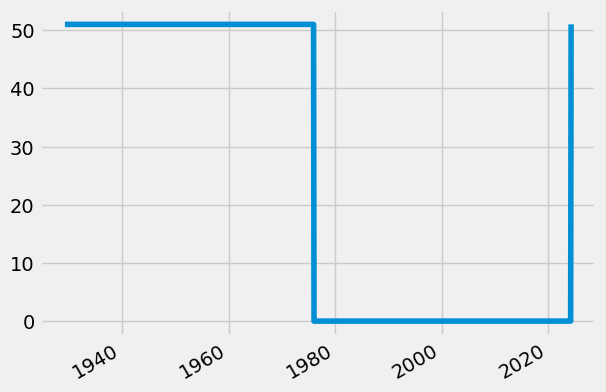

In [103]:
uemp_states.isna().sum(axis=1).plot()

In [105]:
uemp_states = uemp_states.dropna()


In [109]:
px.line(uemp_states)

## Pull April 2020 Unemployment Rate Per State

In [112]:
uemp_states.loc[uemp_states.index=='2020-04-01']

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
2020-04-01  16.1  12.8  15.6  13.4  16.1  16.5  22.6  13.8  17.4  14.2  18.1   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
2020-04-01  15.0  12.4  11.2  13.8  14.0  12.0  16.8  11.8   9.0   8.9  15.8   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
2020-04-01  16.7   9.0  13.7  15.8  30.6  10.1  12.5  11.6  11.7  11.0  10.0   

            INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  IDUR  \
2020-04-01  16.8  13.5  22.5   8.7  12.0  11.2  15.6   9.3   8.2   8.3  11.8   

            NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
2020-04-01  16.0  17.9  12.1   5.1  13.1  14.1   8.8

In [113]:
uemp_states.loc[uemp_states.index=='2020-04-01'].T.sort_values('2020-04-01',ascending=False)

2020-04-01
NVUR        30.6
MIUR        22.6
HIUR        22.5
ILUR        18.1
RIUR        17.9
MAUR        17.4
KYUR        16.8
INUR        16.8
WAUR        16.7
OHUR        16.5
CAUR        16.1
PAUR        16.1
NHUR        16.0
TNUR        15.8
WVUR        15.8
NYUR        15.6
MSUR        15.6
NJUR        15.0
NCUR        14.2
VTUR        14.1
WIUR        14.0
AZUR        13.8
ALUR        13.8
ORUR        13.7
LAUR        13.5
FLUR        13.4
DEUR        13.1
TXUR        12.8
OKUR        12.5
GAUR        12.4
KSUR        12.1
VAUR        12.0
MTUR        12.0
IDUR        11.8
SCUR        11.8
AKUR        11.7
MOUR        11.6
DCUR        11.2
COUR        11.2
IAUR        11.0
ARUR        10.1
UTUR        10.0
MEUR         9.3
NMUR         9.0
MDUR         9.0
MNUR         8.9
SDUR         8.8
NDUR         8.7
CTUR         8.3
NEUR         8.2
WYUR         5.1

<Axes: >

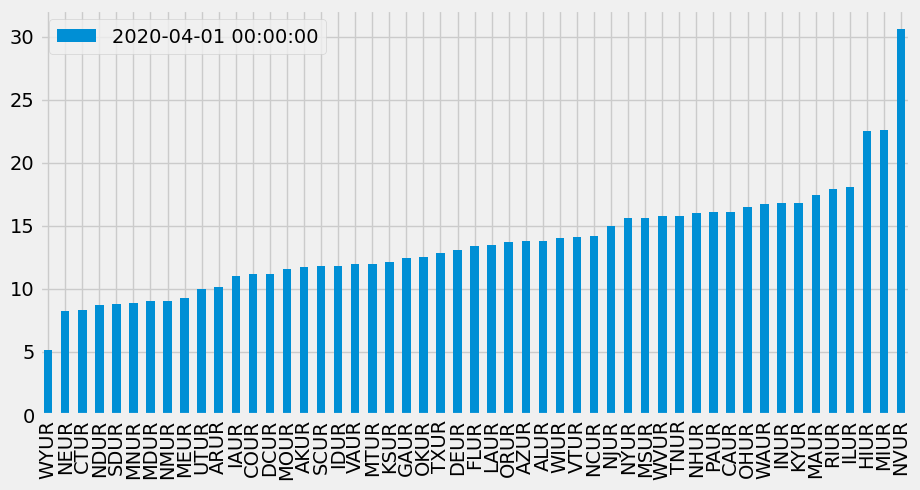

In [115]:
uemp_states.loc[uemp_states.index=='2020-04-01']\
.T.sort_values('2020-04-01')\
.plot(kind='bar', figsize=(10,5))

In [127]:
uemp_states.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'INUR', 'LAUR', 'HIUR',
       'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR', 'NHUR',
       'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object')

In [116]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-05-09   2024-05-09   
LNS14000006            LNS14000006     2024-05-09   2024-05-09   
CAUR                          CAUR     2024-05-09   2024-05-09   
TXUR                          TXUR     2024-05-09   2024-05-09   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-05-09   2024-05-09   
...                            ...            ...          ...   
LNS14000048            LNS14000048     2024-05-09   2024-05-09   
LNS14000089            LNS14000089     2024-05-09   2024-05-09   
M08311USM156SNBR  M08311USM156SNBR     2024-05-09   2024-05-09   
LNS14000150            LNS14000150     2024-05-09   2024-05-09   
LRUN25TTUSM156S    LRUN25TTUSM156S     2024-05-09   2024-05-09   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Infra-Annual Labor Statistics: Unemployment Ra...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-04-01   Monthly               M   
LNS14000006             1972-01-01      2024-04-01   Monthly               M   
CAUR                    1976-01-01      2024-03-01   Monthly               M   
TXUR                    1976-01-01      2024-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000048             1948-01-01      2024-04-01   Monthly               M   
LNS14000089             1948-01-01      2024-04-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-04-01   Monthly               M   
LRUN25TTUSM156S         1955-01-01      2024-03-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-05-03 07:45:01-05:00   
LNS14000006                             SA  2024-05-03 07:45:19-05:00   
CAUR                                    SA  2024-04-22 10:41:02-05:00   
TXUR                                

In [136]:
unemp_df2 = unemp_df.loc[unemp_df.index.isin(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
                                                'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
                                                'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
                                                'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'INUR', 'LAUR', 'HIUR',
                                                'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR', 'NHUR',
                                                'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'])]
unemp_df2

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2024-05-09   2024-05-09   
TXUR       TXUR     2024-05-09   2024-05-09   
NYUR       NYUR     2024-05-09   2024-05-09   
FLUR       FLUR     2024-05-09   2024-05-09   
PAUR       PAUR     2024-05-09   2024-05-09   
OHUR       OHUR     2024-05-09   2024-05-09   
MIUR       MIUR     2024-05-09   2024-05-09   
ALUR       ALUR     2024-05-09   2024-05-09   
MAUR       MAUR     2024-05-09   2024-05-09   
NCUR       NCUR     2024-05-09   2024-05-09   
ILUR       ILUR     2024-05-09   2024-05-09   
NJUR       NJUR     2024-05-09   2024-05-09   
GAUR       GAUR     2024-05-09   2024-05-09   
COUR       COUR     2024-05-09   2024-05-09   
AZUR       AZUR     2024-05-09   2024-05-09   
WIUR       WIUR     2024-05-09   2024-05-09   
VAUR       VAUR     2024-05-09   2024-05-09   
KYUR       KYUR     2024-05-09   2024-05-09   
SCUR       SCUR     2024-05-09   2024-05-09   
NMUR       NMUR     2024-05-09   2024-05-09   
MNUR       MNUR     2024-05-09   2024-05-09   
TNUR       TNUR     2024-05-09   2024-05-09   
WAUR       WAUR     2024-05-09   2024-05-09   
MDUR       MDUR     2024-05-09   2024-05-09   
ORUR       ORUR     2024-05-09   2024-05-09   
WVUR       WVUR     2024-05-09   2024-05-09   
NVUR       NVUR     2024-05-09   2024-05-09   
ARUR       ARUR     2024-05-09   2024-05-09   
OKUR       OKUR     2024-05-09   2024-05-09   
MOUR       MOUR     2024-05-09   2024-05-09   
AKUR       AKUR     2024-05-09   2024-05-09   
IAUR       IAUR     2024-05-09   2024-05-09   
UTUR       UTUR     2024-05-09   2024-05-09   
INUR       INUR     2024-05-09   2024-05-09   
LAUR       LAUR     2024-05-09   2024-05-09   
HIUR       HIUR     2024-05-09   2024-05-09   
NDUR       NDUR     2024-05-09   2024-05-09   
MTUR       MTUR     2024-05-09   2024-05-09   
DCUR       DCUR     2024-05-09   2024-05-09   
MSUR       MSUR     2024-05-09   2024-05-09   
MEUR       MEUR     2024-05-09   2024-05-09   
NEUR       NEUR     2024-05-09   2024-05-09   
CTUR       CTUR     2024-05-09   2024-05-09   
IDUR       IDUR     2024-05-09   2024-05-09   
NHUR       NHUR     2024-05-09   2024-05-09   
RIUR       RIUR     2024-05-09   2024-05-09   
KSUR       KSUR     2024-05-09   2024-05-09   
WYUR       WYUR     2024-05-09   2024-05-09   
DEUR       DEUR     2024-05-09   2024-05-09   
VTUR       VTUR     2024-05-09   2024-05-09   
SDUR       SDUR     2024-05-09   2024-05-09   

                                                   title observation_start  \
series id                                                                    
CAUR                     Unemployment Rate in California        1976-01-01   
TXUR                          Unemployment Rate in Texas        1976-01-01   
NYUR                       Unemployment Rate in New York        1976-01-01   
FLUR                        Unemployment Rate in Florida        1976-01-01   
PAUR                   Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                           Unemployment Rate in Ohio        1976-01-01   
MIUR                       Unemployment Rate in Michigan        1976-01-01   
ALUR                        Unemployment Rate in Alabama        1976-01-01   
MAUR                  Unemployment Rate in Massachusetts        1976-01-01   
NCUR                 Unemployment Rate in North Carolina        1976-01-01   
ILUR                       Unemployment Rate in Illinois        1976-01-01   
NJUR                     Unemployment Rate in New Jersey        1976-01-01   
GAUR                        Unemployment Rate in Georgia        1976-01-01   
COUR                       Unemployment Rate in Colorado        1976-01-01   
AZUR                        Unemployment Rate in Arizona        1976-01-01   
WIUR                      Unemployment Rate in Wisconsin        1976-01-01   
VAUR                       Unemployment Rate in Virginia        1976-01-01   
KYUR                       Unemployment

In [137]:
unemp_df2['title'].str.strip('Unemployment Rate In')

series id
CAUR                  in Californi
TXUR                      in Texas
NYUR                   in New York
FLUR                     in Florid
PAUR                in Pennsylvani
OHUR                        in Ohi
MIUR                     in Michig
ALUR                       in Alab
MAUR              in Massachusetts
NCUR               in North Caroli
ILUR                   in Illinois
NJUR                   in New Jers
GAUR                     in Georgi
COUR                    in Colorad
AZUR                       in Ariz
WIUR                   in Wisconsi
VAUR                    in Virgini
KYUR                    in Kentuck
SCUR               in South Caroli
NMUR                  in New Mexic
MNUR                     in Minnes
TNUR                    in Tenness
WAUR                    in Washing
MDUR                   in Maryland
ORUR                       in Oreg
WVUR               in West Virgini
NVUR                      in Nevad
ARUR                   in Arkansas
OKUR      

In [138]:
unemp_df2['title'].str.replace('Unemployment Rate In','')

series id
CAUR                  Unemployment Rate in California
TXUR                       Unemployment Rate in Texas
NYUR                    Unemployment Rate in New York
FLUR                     Unemployment Rate in Florida
PAUR                Unemployment Rate in Pennsylvania
OHUR                        Unemployment Rate in Ohio
MIUR                    Unemployment Rate in Michigan
ALUR                     Unemployment Rate in Alabama
MAUR               Unemployment Rate in Massachusetts
NCUR              Unemployment Rate in North Carolina
ILUR                    Unemployment Rate in Illinois
NJUR                  Unemployment Rate in New Jersey
GAUR                     Unemployment Rate in Georgia
COUR                    Unemployment Rate in Colorado
AZUR                     Unemployment Rate in Arizona
WIUR                   Unemployment Rate in Wisconsin
VAUR                    Unemployment Rate in Virginia
KYUR                    Unemployment Rate in Kentucky
SCUR              

In [139]:
unemp_df2['title'].str.replace('Unemployment Rate in ','').to_dict()

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'CTUR': 'Connecticut',
 'IDUR': 'Idaho',
 'NHUR': 'New Hampshire',
 'RIUR': 'Rhode Islan

In [170]:
id_to_state = unemp_df2['title'].str.replace('Unemployment Rate in ','').to_dict()
id_to_state

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'CTUR': 'Connecticut',
 'IDUR': 'Idaho',
 'NHUR': 'New Hampshire',
 'RIUR': 'Rhode Islan

In [142]:
uemp_states.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'INUR', 'LAUR', 'HIUR',
       'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR', 'NHUR',
       'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object')

In [145]:
[id_to_state[c] for c in uemp_states.columns]

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'Ohio',
 'Michigan',
 'Alabama',
 'Massachusetts',
 'North Carolina',
 'Illinois',
 'New Jersey',
 'Georgia',
 'Colorado',
 'Arizona',
 'Wisconsin',
 'Virginia',
 'Kentucky',
 'South Carolina',
 'New Mexico',
 'Minnesota',
 'Tennessee',
 'Washington',
 'Maryland',
 'Oregon',
 'West Virginia',
 'Nevada',
 'Arkansas',
 'Oklahoma',
 'Missouri',
 'Alaska',
 'Iowa',
 'Utah',
 'Indiana',
 'Louisiana',
 'Hawaii',
 'North Dakota',
 'Montana',
 'the District of Columbia',
 'Mississippi',
 'Maine',
 'Nebraska',
 'Connecticut',
 'Idaho',
 'New Hampshire',
 'Rhode Island',
 'Kansas',
 'Wyoming',
 'Delaware',
 'Vermont',
 'South Dakota']

In [146]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [147]:
uemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'the District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [148]:
px.line(uemp_states)

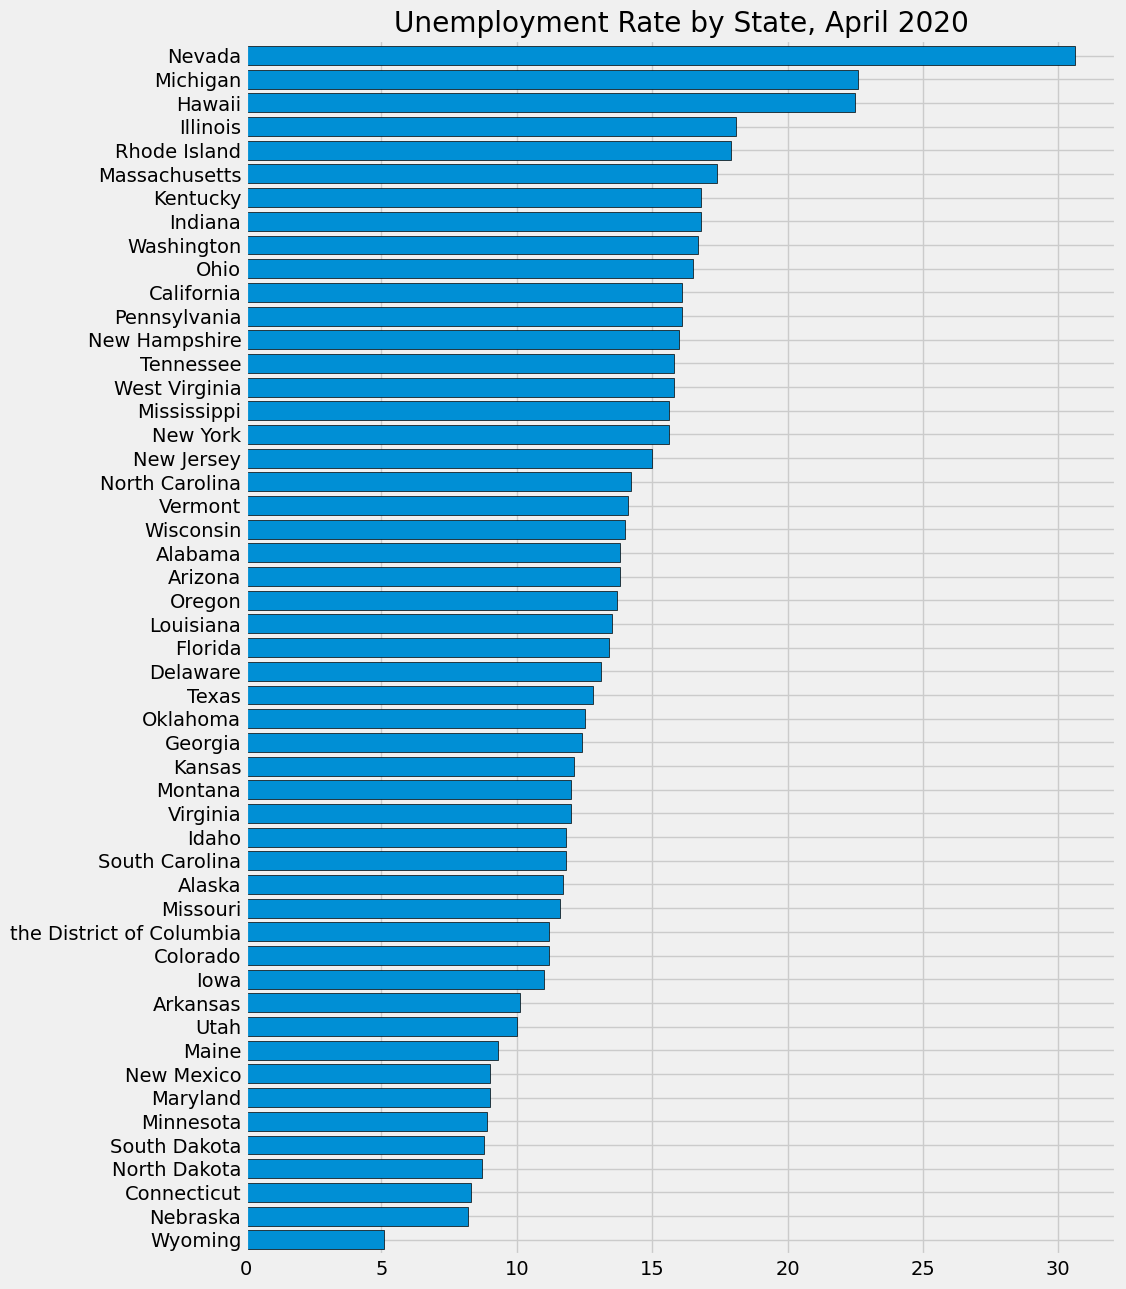

In [160]:
ax = uemp_states.loc[uemp_states.index=='2020-04-01']\
.T.sort_values('2020-04-01')\
.plot(kind='barh', figsize=(10,15),width=0.8,edgecolor='black',
     title="Unemployment Rate by State, April 2020")
ax.legend().remove()
plt.show()

# Pull Partition Rate

In [168]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment =="Seasonally Adjusted" and units == "Percent"')
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-05-09   2024-05-09   
LNS11300060          LNS11300060     2024-05-09   2024-05-09   
LNS11300002          LNS11300002     2024-05-09   2024-05-09   
LNS11300001          LNS11300001     2024-05-09   2024-05-09   
LNS11324230          LNS11324230     2024-05-09   2024-05-09   
...                          ...            ...          ...   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-05-09   2024-05-09   
LRIN64MAUSM156S  LRIN64MAUSM156S     2024-05-09   2024-05-09   
LRIN64FEUSM156S  LRIN64FEUSM156S     2024-05-09   2024-05-09   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-05-09   2024-05-09   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-05-09   2024-05-09   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-04-01   Monthly               M   
LNS11300060            1948-01-01      2024-04-01   Monthly               M   
LNS11300002            1948-01-01      2024-04-01   Monthly               M   
LNS11300001            1948-01-01      2024-04-01   Monthly               M   
LNS11324230            1948-01-01      2024-04-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74MAUSM156S        1981-01-01      2024-03-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2024-03-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2024-03-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-03-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-03-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2024-05-03 07:45:17-05:00   
LNS11300060                            SA 2024-05-03 07:45:21-05:00   
LNS11300002                            SA 2024-05-03 07:45:26-05:00   
LNS11300001                            SA 2024-05-03 07:45:26-05:00   
LNS11324230                           

In [167]:
part_df.index

Index(['CIVPART', 'LNS11300060', 'LNS11300002', 'LNS11300001', 'LNS11324230',
       'LNS11300012', 'LNS11300006', 'LRAC25MAUSM156S', 'LNS11300036',
       'LRAC25FEUSM156S',
       ...
       'LRIN25TTUSM156S', 'LRIN55MAUSM156S', 'LRIN24MAUSM156S',
       'LRIN24FEUSM156S', 'LRIN74FEUSM156S', 'LRIN74MAUSM156S',
       'LRIN64MAUSM156S', 'LRIN64FEUSM156S', 'LRIN55FEUSM156S',
       'LRIN25FEUSM156S'],
      dtype='object', name='series id', length=109)

In [192]:
part_df[part_df.index.str.contains('LBSSA')]


id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-05-09   2024-05-09   
LBSSA01    LBSSA01     2024-05-09   2024-05-09   
LBSSA36    LBSSA36     2024-05-09   2024-05-09   
LBSSA26    LBSSA26     2024-05-09   2024-05-09   
LBSSA28    LBSSA28     2024-05-09   2024-05-09   
LBSSA48    LBSSA48     2024-05-09   2024-05-09   
LBSSA12    LBSSA12     2024-05-09   2024-05-09   
LBSSA21    LBSSA21     2024-05-09   2024-05-09   
LBSSA39    LBSSA39     2024-05-09   2024-05-09   
LBSSA55    LBSSA55     2024-05-09   2024-05-09   
LBSSA42    LBSSA42     2024-05-09   2024-05-09   
LBSSA25    LBSSA25     2024-05-09   2024-05-09   
LBSSA27    LBSSA27     2024-05-09   2024-05-09   
LBSSA24    LBSSA24     2024-05-09   2024-05-09   
LBSSA54    LBSSA54     2024-05-09   2024-05-09   
LBSSA47    LBSSA47     2024-05-09   2024-05-09   
LBSSA23    LBSSA23     2024-05-09   2024-05-09   
LBSSA17    LBSSA17     2024-05-09   2024-05-09   
LBSSA37    LBSSA37     2024-05-09   2024-05-09   
LBSSA13    LBSSA13     2024-05-09   2024-05-09   
LBSSA22    LBSSA22     2024-05-09   2024-05-09   
LBSSA45    LBSSA45     2024-05-09   2024-05-09   
LBSSA08    LBSSA08     2024-05-09   2024-05-09   
LBSSA49    LBSSA49     2024-05-09   2024-05-09   
LBSSA51    LBSSA51     2024-05-09   2024-05-09   
LBSSA18    LBSSA18     2024-05-09   2024-05-09   
LBSSA29    LBSSA29     2024-05-09   2024-05-09   
LBSSA34    LBSSA34     2024-05-09   2024-05-09   
LBSSA19    LBSSA19     2024-05-09   2024-05-09   
LBSSA02    LBSSA02     2024-05-09   2024-05-09   
LBSSA53    LBSSA53     2024-05-09   2024-05-09   
LBSSA04    LBSSA04     2024-05-09   2024-05-09   
LBSSA35    LBSSA35     2024-05-09   2024-05-09   
LBSSA16    LBSSA16     2024-05-09   2024-05-09   
LBSSA05    LBSSA05     2024-05-09   2024-05-09   
LBSSA40    LBSSA40     2024-05-09   2024-05-09   
LBSSA31    LBSSA31     2024-05-09   2024-05-09   
LBSSA15    LBSSA15     2024-05-09   2024-05-09   
LBSSA32    LBSSA32     2024-05-09   2024-05-09   
LBSSA30    LBSSA30     2024-05-09   2024-05-09   
LBSSA41    LBSSA41     2024-05-09   2024-05-09   
LBSSA33    LBSSA33     2024-05-09   2024-05-09   
LBSSA50    LBSSA50     2024-05-09   2024-05-09   
LBSSA09    LBSSA09     2024-05-09   2024-05-09   
LBSSA38    LBSSA38     2024-05-09   2024-05-09   
LBSSA46    LBSSA46     2024-05-09   2024-05-09   
LBSSA20    LBSSA20     2024-05-09   2024-05-09   
LBSSA44    LBSSA44     2024-05-09   2024-05-09   
LBSSA11    LBSSA11     2024-05-09   2024-05-09   
LBSSA10    LBSSA10     2024-05-09   2024-05-09   
LBSSA56    LBSSA56     2024-05-09   2024-05-09   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [193]:
part_df = part_df[part_df.index.str.contains('LBSSA')]
part_df.shape

(51, 15)

In [194]:
part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [195]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_id_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [196]:
#make a list called all_result that will store all results, everyitme it loops 
#it will store/append the results in the all_results list
all_results = []        

for myid in part_df.index:  
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states= pd.concat(all_results, axis=1)
part_states
# [part_id_to_state[x] for x in part_states.columns]
#part_states.columns = [part_id_to_state[x] for x in part_states.columns]
#part_states

LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.6     57.0     58.0     61.6     58.8     63.8     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.7   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.4     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.5     55.5   
1976-05-01     62.3     56.8     58.1     61.7     58.5     63.6     55.4   
...             ...      ...      ...      ...      ...      ...      ...   
2023-11-01     62.0     57.5     61.4     62.3     53.8     64.3     59.5   
2023-12-01     62.1     57.4     61.5     62.3     53.8     64.2     59.5   
2024-01-01     62.1     57.4     61.4     62.3     53.8     64.1     59.4   
2024-02-01     62.1     57.4     61.4     62.2     53.7     64.1     59.4   
2024-03-01     62.0     57.4     61.4     62.3     53.7     64.1     59.4   

            LBSSA21  LBSSA39  LBSSA55  LBSSA42  LBSSA25  LBSSA27  LBSSA24  \
1976-01-01     60.5     61.7     65.6     58.4     64.8     65.6     64.3   
1976-02-01     60.3     61.7     65.5     58.3     64.7     65.5     64.2   
1976-03-01     60.2     61.7     65.4     58.3     64.6     65.4     64.1   
1976-04-01     60.1     61.6     65.4     58.3     64.6     65.4     64.1   
1976-05-01     60.1     61.6     65.5     58.3     64.6     65.5     64.1   
...             ...      ...      ...      ...      ...      ...      ...   
2023-11-01     57.0     61.8     66.0     62.3     64.9     68.1     65.2   
2023-12-01     56.9     61.8     65.9     62.3     64.9     68.0     65.1   
2024-01-01     56.9     61.8     65.9     62.4     64.9     68.0     65.1   
2024-02-01     56.9     61.8     65.7     62.5     64.8     67.9     65.0   
2024-03-01     56.9     61.8     65.6     62.7     64.9     68.0     65.0   

            LBSSA54  LBSSA47  LBSSA23  LBSSA17  LBSSA37  LBSSA13  LBSSA22  \
1976-01-01     52.5     59.6     62.1     63.0     66.5     63.7     56.8   
1976-02-01     52.4     59.4     61.9     63.0     66.3     63.6     56.6   
1976-03-01     52.3     59.3     61.9     62.9     66.2     63.5     56.5   
1976-04-01     52.3     59.3     61.8     62.9     66.2     63.5     56.4   
1976-05-01     52.2     59.4     61.7     63.0     66.3     63.6     56.4   
...             ...      ...      ...      ...      ...      ...      ...   
2023-11-01     55.2     59.6     59.4     64.5     60.8     61.5     58.6   
2023-12-01     55.2     59.5     59.3     64.5     60.7     61.5     58.6   
2024-01-01     55.3     59.5     59.3     64.6     60.7     61.4     58.7   
2024-02-01     55.2     59.5     59.3     64.6     60.7     61.4     58.7   
2024-03-01     55.2     59.6     59.3     64.6     60.6     61.4     58.7   

            LBSSA45  LBSSA08  LBSSA49  LBSSA51  LBSSA18  LBSSA29  LBSSA34  \
1976-01-01     65.3     67.2     62.8     65.9     64.0     60.5     61.5   
1976-02-01     65.2     67.0     62.6     65.8     63.9     60.3     61.4   
1976-03-01     65.0     66.8     62.5     65.6     63.8     60.3     61.4   
1976-04-01     64.9     66.6     62.5     65.5     63.8     60.4     61.5   
1976-05-01     64.7     66.5     62.6     65.4     63.9     60.6     61.6   
...             ...      ...      ...      ...      ...      ...      ...   
2023-11-01     57.3     68.3     69.5     66.5     63.2     63.1     64.8   
2023-12-01     57.2     68.3     69.4     66.5     63.2     63.1     64.8   
2024-01-01     57.2     68.1     69.3     66.6     63.0     63.1     64.6   
2024-02-01     57.1     68.1     69.2     66.6     62.8     63.1     64.5   
2024-03-01     57.1     68.0     69.0     66.5     62.6     63.1     64.5   

            LBSSA19  LBSSA02  LBSSA53  LBSSA04  LBSSA35  LBSSA16  LBSSA05  \
1976-01-01     64.4     69.0     60.9     59.5     60.8     63.0     57.9   
1976-02-01     64.3     68.4     60.7     59.2     60.5     62.8     57.8   
1976-03-01     64.2     67.8     60.6     59.1     60.3     62.7     57.7   
1976

In [199]:
 [part_id_to_state[x] for x in part_states.columns]

['California',
 'Alabama',
 'New York',
 'Michigan',
 'Mississippi',
 'Texas',
 'Florida',
 'Kentucky',
 'Ohio',
 'Wisconsin',
 'Pennsylvania',
 'Massachusetts',
 'Minnesota',
 'Maryland',
 'West Virginia',
 'Tennessee',
 'Maine',
 'Illinois',
 'North Carolina',
 'Georgia',
 'Louisiana',
 'South Carolina',
 'Colorado',
 'Utah',
 'Virginia',
 'Indiana',
 'Missouri',
 'New Jersey',
 'Iowa',
 'Alaska',
 'Washington',
 'Arizona',
 'New Mexico',
 'Idaho',
 'Arkansas',
 'Oklahoma',
 'Nebraska',
 'Hawaii',
 'Nevada',
 'Montana',
 'Oregon',
 'New Hampshire',
 'Vermont',
 'Connecticut',
 'North Dakota',
 'South Dakota',
 'Kansas',
 'Rhode Island',
 'District Of Columbia',
 'Delaware',
 'Wyoming']

In [200]:
part_states.columns = [part_id_to_state[x] for x in part_states.columns]
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   
...                ...      ...       ...       ...          ...    ...   
2023-11-01        62.0     57.5      61.4      62.3         53.8   64.3   
2023-12-01        62.1     57.4      61.5      62.3         53.8   64.2   
2024-01-01        62.1     57.4      61.4      62.3         53.8   64.1   
2024-02-01        62.1     57.4      61.4      62.2         53.7   64.1   
2024-03-01        62.0     57.4      61.4      62.3         53.7   64.1   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   
...             ...       ...   ...        ...           ...            ...   
2023-11-01     59.5      57.0  61.8       66.0          62.3           64.9   
2023-12-01     59.5      56.9  61.8       65.9          62.3           64.9   
2024-01-01     59.4      56.9  61.8       65.9          62.4           64.9   
2024-02-01     59.4      56.9  61.8       65.7          62.5           64.8   
2024-03-01     59.4      56.9  61.8       65.6          62.7           64.9   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   
...               ...       ...            ...        ...    ...       ...   
2023-11-01       68.1      65.2           55.2       59.6   59.4      64.5   
2023-12-01       68.0      65.1           55.2       59.5   59.3      64.5   
2024-01-01       68.0      65.1           55.3       59.5   59.3      64.6   
2024-02-01       67.9      65.0           55.2       59.5   59.3      64.6   
2024-03-01       68.0      65.0           55.2       59.6   59.3      64.6   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   
...                    ...      ...        ...             ...       ...   
2023-11-01            60.8     61.5       58.6            57.3      68.3   
2023-12-01            60.7     61.5       58.6            57.2      68.3   
2024-01-01            60.7     61.4       58.7            57.2      68.1   
2024-02-01            60.7     61.4       58.7            57.1      68.1   
2024-03-01            60.6     61.4       58.7            57.1      68.0   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  

In [204]:
px.line(part_states)

## Plot Unemployment vs Participation

In [225]:
#Fix DC column, remove the 'the'
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})


<Axes: >

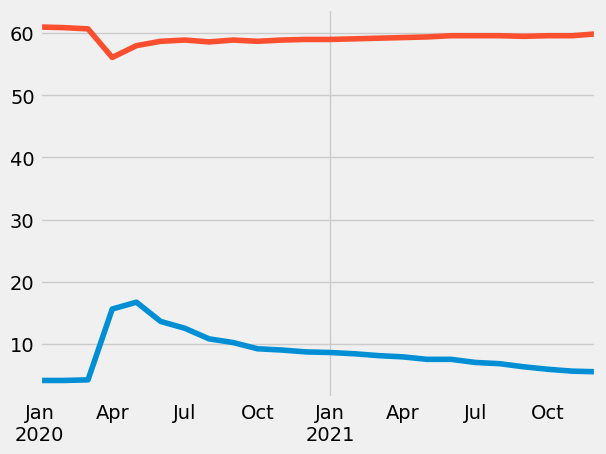

In [226]:
fig, ax=plt.subplots()
uemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax = ax)
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax = ax)

In [227]:
#import matplotlib.pyplot as plt

# Create a figure and axis object
#fig, ax = plt.subplots()

# Plot unemployment data for New York from uemp_states DataFrame
#uemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='uemp_states')

# Plot unemployment data for New York from part_states DataFrame
#part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='part_states')

# Set labels and title
#ax.set_xlabel('Year')
#ax.set_ylabel('Unemployment Rate')
#ax.set_title('Unemployment Rate Comparison for New York (2020-2021)')

# Add legend
#ax.legend()

# Show the plot
#plt.show()

Text(0.5, 1.0, 'New York')

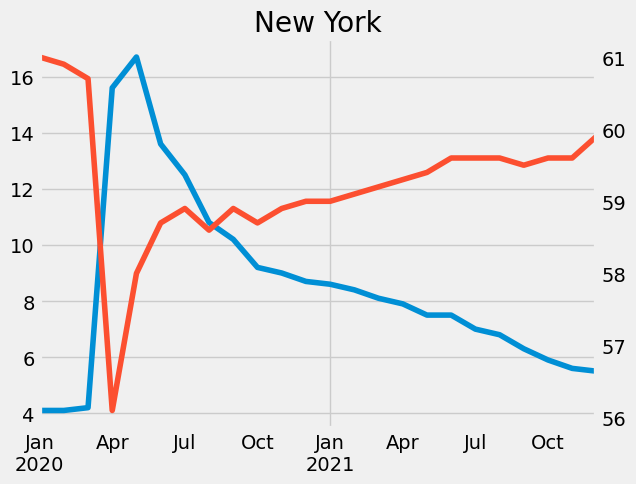

In [228]:
fig, ax=plt.subplots()
ax2=ax.twinx()
uemp_states.query('index >= 2020 and index < 2022')['New York']\
.plot(ax = ax, label="Unemployment")
part_states.query('index >= 2020 and index < 2022')\
['New York'].plot(ax = ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')
#We create a twin axis ax2 using ax.twinx() to share the same x-axis with the first axis ax.
#We plot the unemployment data for New York from uemp_states DataFrame on the first axis ax, 
#and participation data from part_states DataFrame on the twin axis ax2.

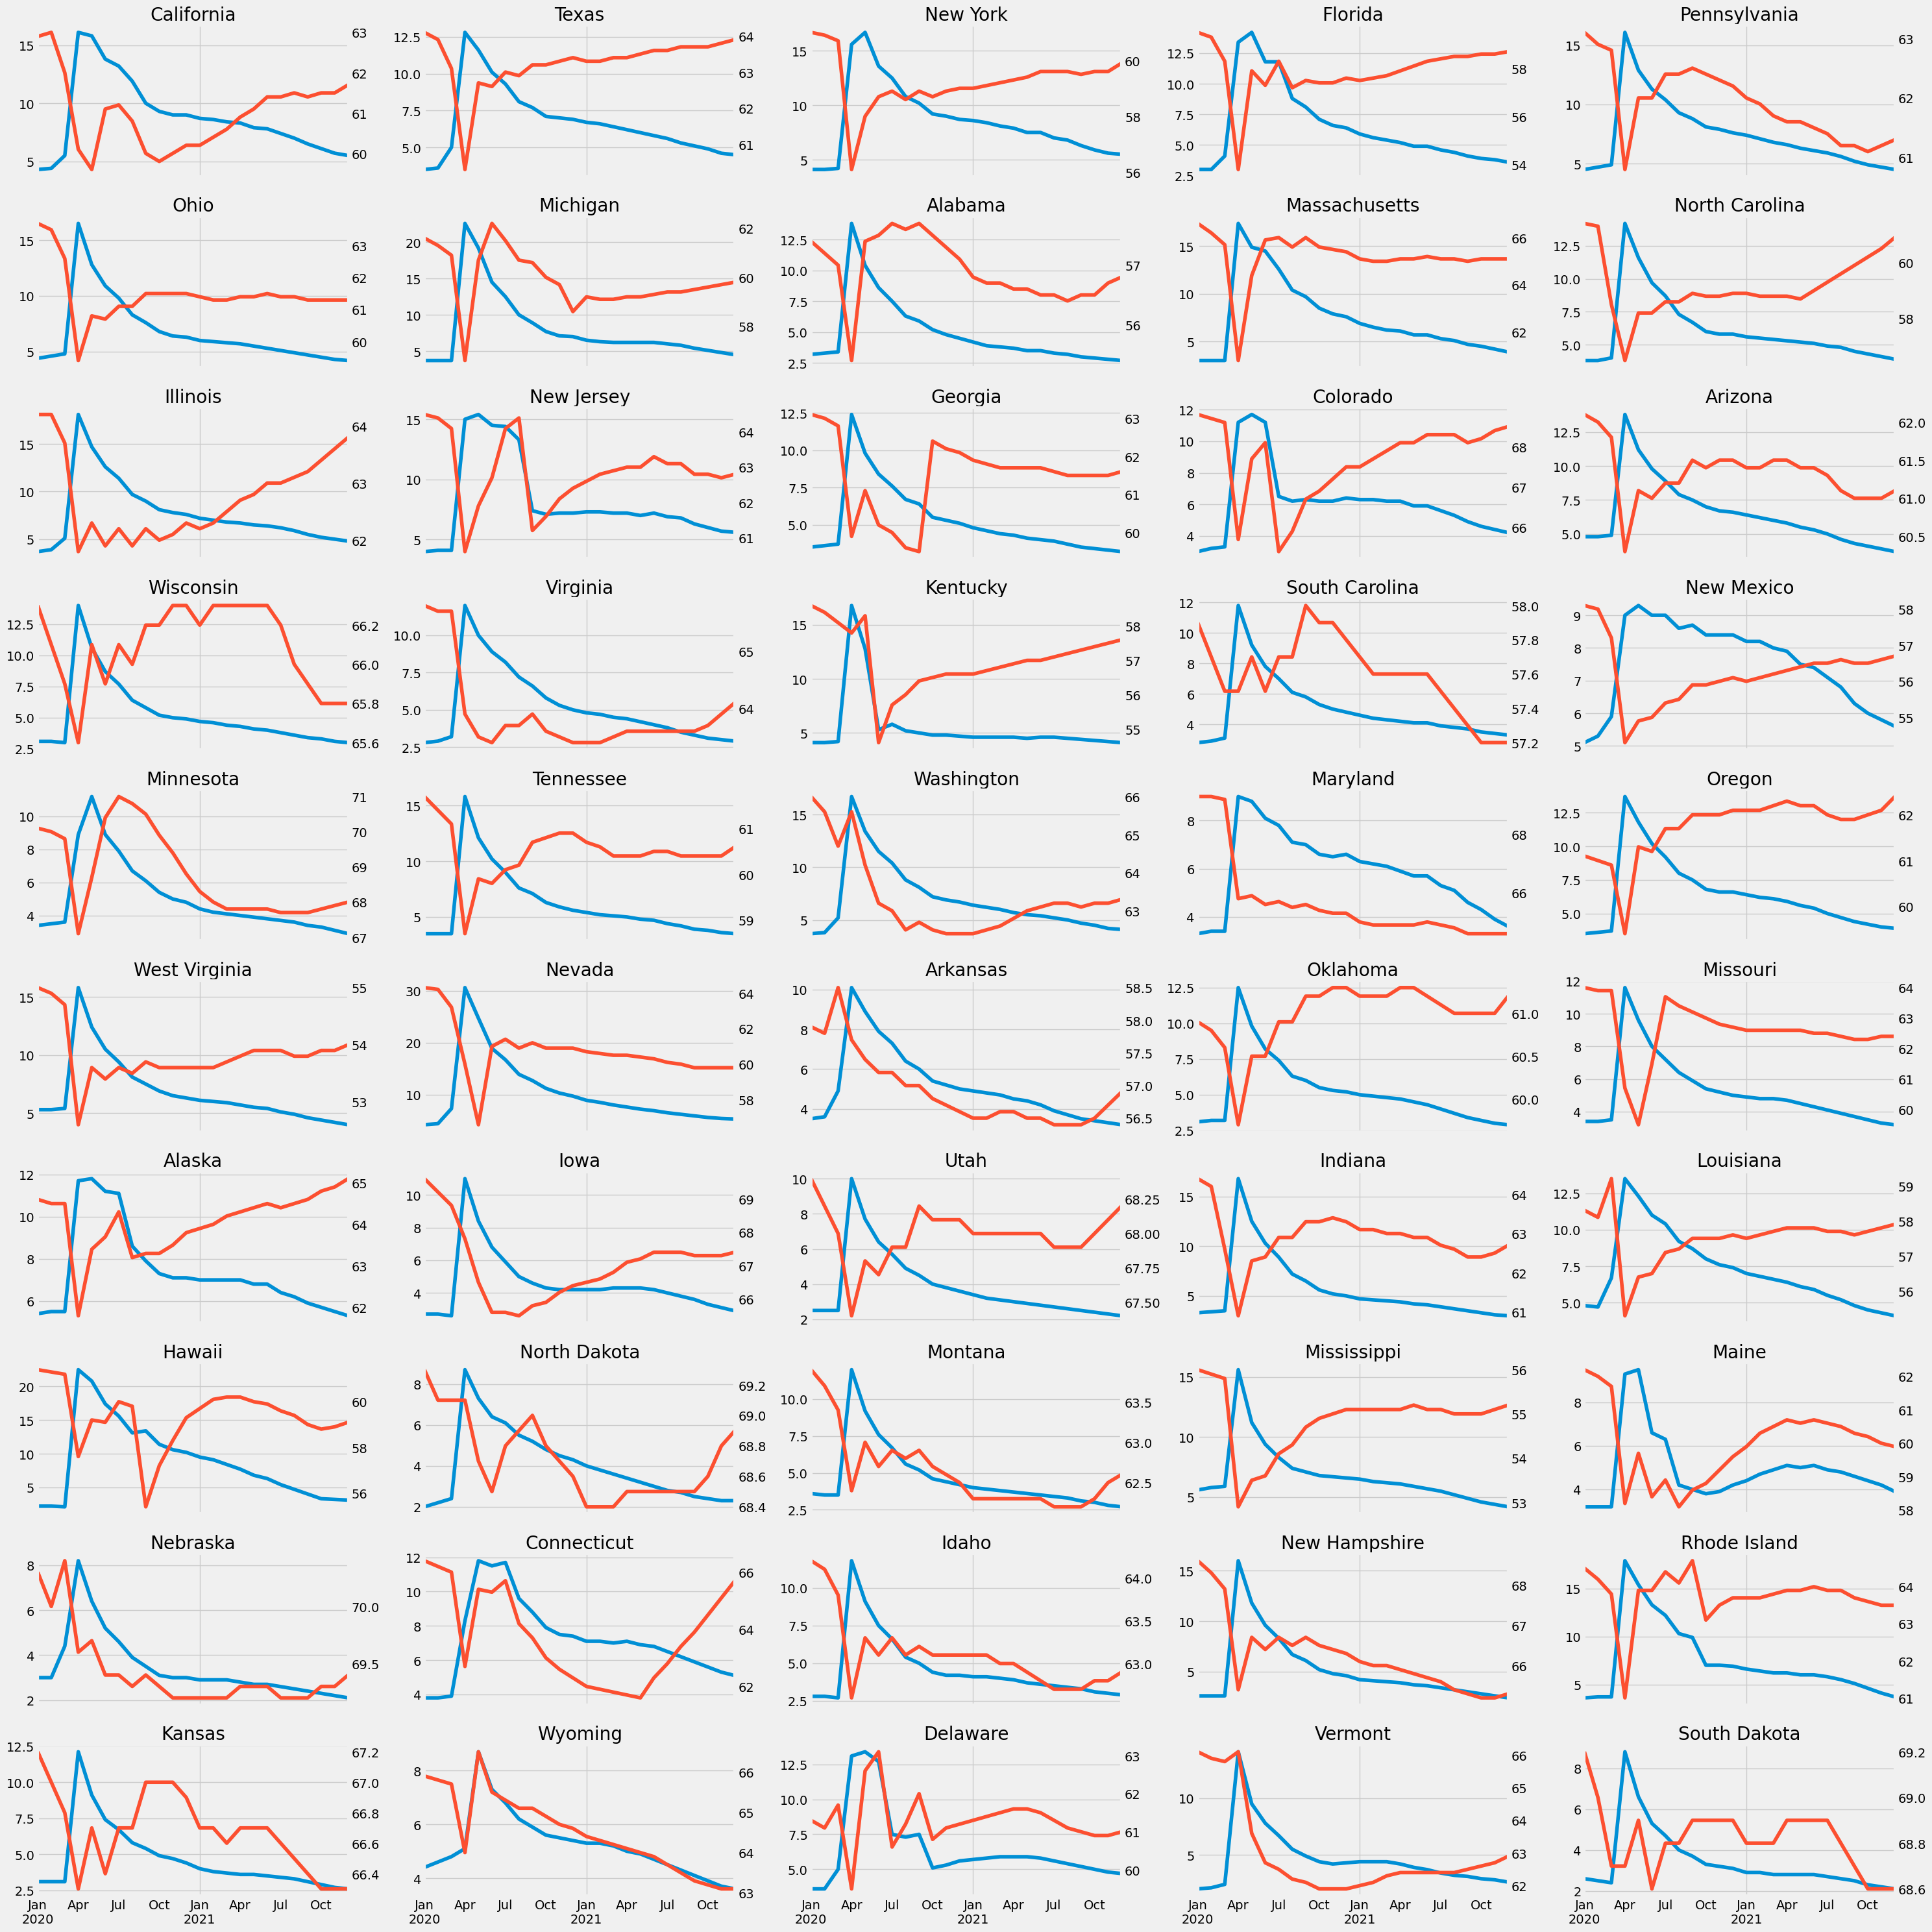

In [242]:
fig, axs=plt.subplots(10,5,figsize=(30,30),sharex=True)
axs=axs.flatten()

# Iterate over each state
i = 0
for state in uemp_states.columns:
    if state == "District Of Columbia": 
        continue
     # Assign each subplot to corresponding axes
    ax2=axs[i].twinx()
      # Plot unemployment data for the state on the first axis
    uemp_states.query('index >= 2020 and index < 2022')[state]\
    .plot(ax = axs[i], label="Unemployment")
       # Plot participation data for the state on the twin axis
    part_states.query('index >= 2020 and index < 2022')[state]\
    .plot(ax = ax2, label='Participation', color=color_pal[1])
    
       # Turn off grid for the twin axis
    ax2.grid(False)
    # Set title for the subplot
    axs[i].set_title(state,fontsize=12)
    i += 1
# Adjust layout to prevent overlapping titles
plt.tight_layout()    
plt.show()

# THE END 